In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

### Extract csv

In [36]:
data_path = '../data'
file_name = 'train.csv'
full_path = os.path.join(data_path, file_name)
train_df = pd.read_csv(full_path)
train_df.shape


(42000, 785)

In [37]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data_path = '../data'
file_name = 'test.csv'
full_path = os.path.join(data_path, file_name)
test_df = pd.read_csv(full_path)
test_df.shape

(28000, 784)

In [38]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### First image

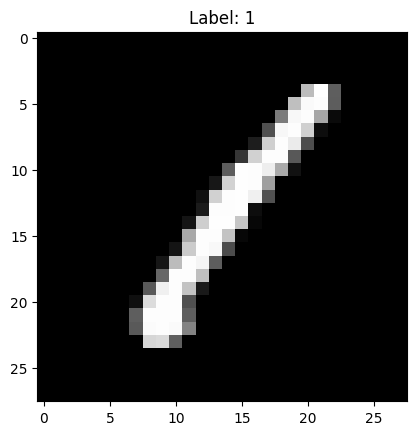

In [25]:
# Extract the label and the pixel values of the first image
first_image_label = train_df.iloc[0, 0]
first_image_pixels = train_df.iloc[0, 1:].values

# Reshape the pixel values into a 2D array (28x28 for MNIST-like datasets)
first_image_2d = first_image_pixels.reshape(28, 28)

# Display the first image using matplotlib
plt.imshow(first_image_2d, cmap='gray')
plt.title(f'Label: {first_image_label}')
plt.show()

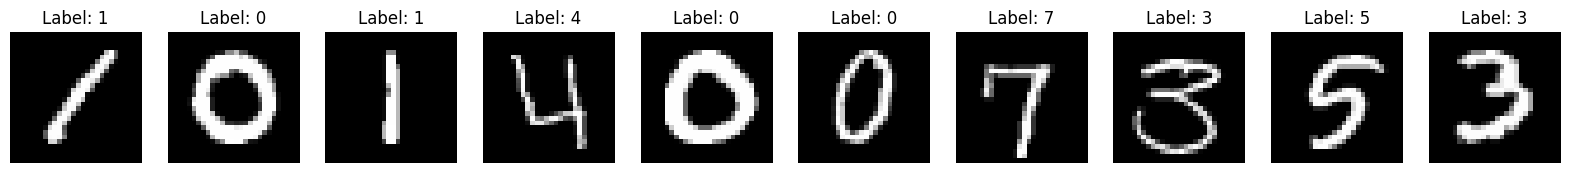

In [26]:
num_images = 10

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, num_images, figsize=(20, 2))

for i in range(num_images):
    # Extract the label and the pixel values of the i-th image
    image_label = train_df.iloc[i, 0]
    image_pixels = train_df.iloc[i, 1:].values
    
    # Reshape the pixel values into a 2D array (28x28 for MNIST-like datasets)
    image_2d = image_pixels.reshape(28, 28)
    
    # Display the i-th image on the corresponding subplot
    axes[i].imshow(image_2d, cmap='gray')
    axes[i].set_title(f'Label: {image_label}')
    axes[i].axis('off')

# Show the plot
plt.show()

## basic deep learning model

In [27]:
# Separate features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

In [28]:
unique, counts = np.unique(y_train, return_counts=True)
label_counts = dict(zip(unique, counts))

label_counts

{0: 4132,
 1: 4684,
 2: 4177,
 3: 4351,
 4: 4072,
 5: 3795,
 6: 4137,
 7: 4401,
 8: 4063,
 9: 4188}

In [29]:
unique_values = np.unique(X_train)
unique_values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Epoch 1/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.1761 - accuracy: 0.9458 - val_loss: 0.0621 - val_accuracy: 0.9811
Epoch 2/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0692 - val_accuracy: 0.9774
Epoch 3/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0395 - val_accuracy: 0.9885
Epoch 4/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 5/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0363 - val_accuracy: 0.9894
Epoch 6/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 7/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0359 - val_accurac

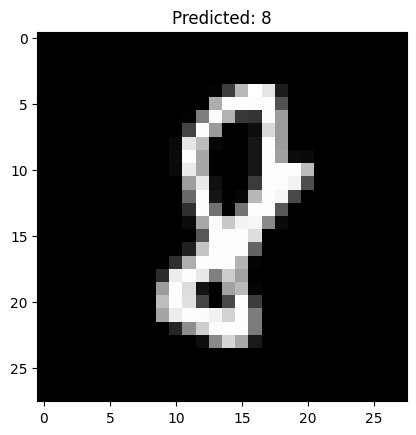

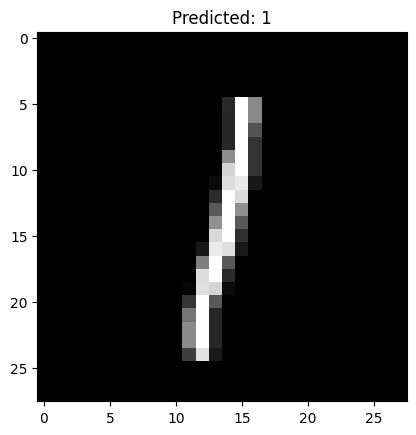

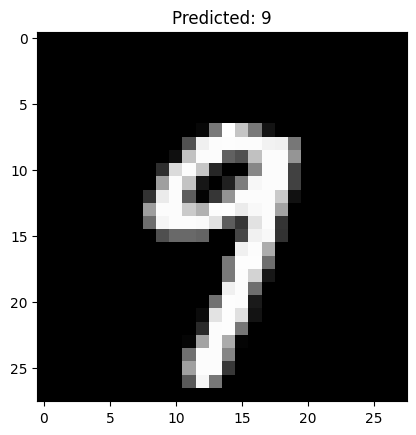

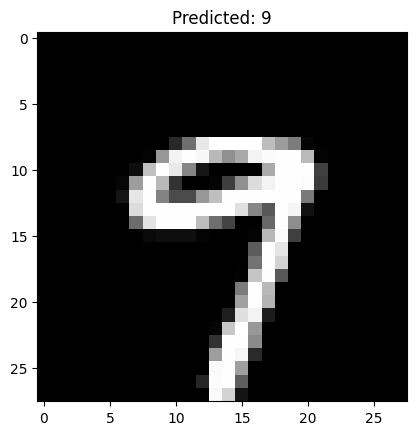

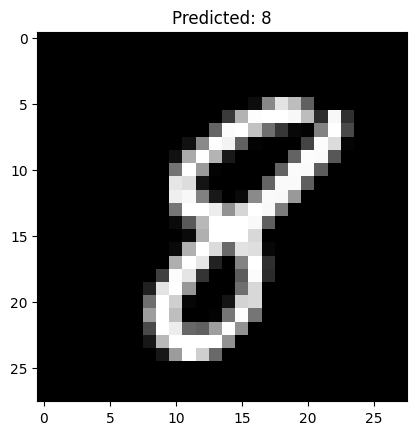

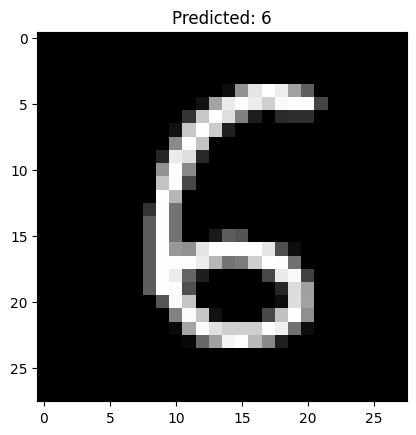

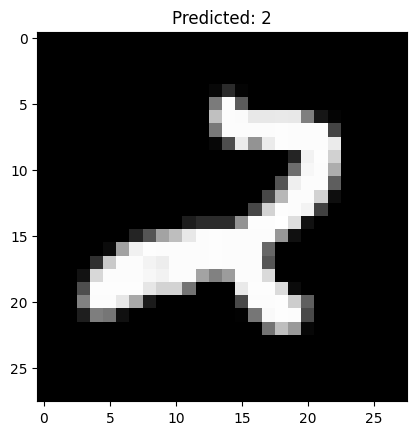

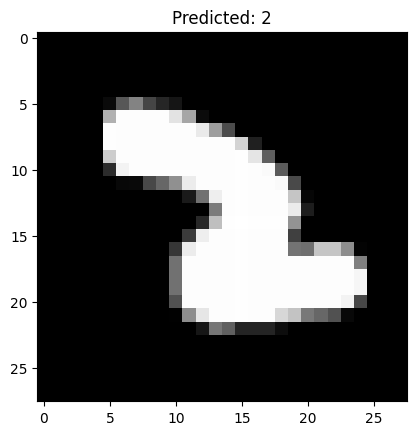

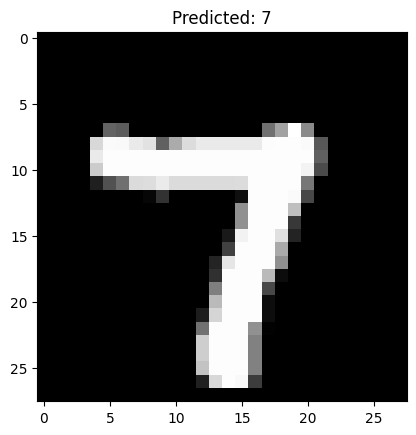

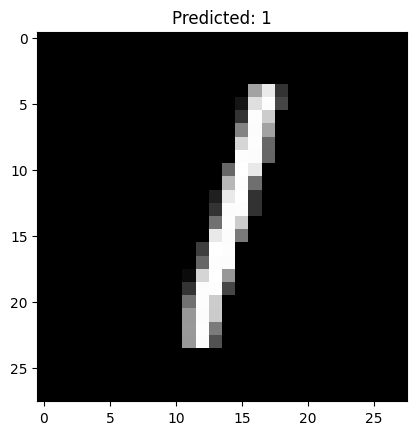

In [42]:
# Separate features and labels
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values

# Normalize the pixel values
X = X / 255.0

# Reshape the data to fit the model (num_samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y = to_categorical(y, num_classes=10)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model_path = '../model'
model_name = 'digit_classifier.h5'
model_full_path = os.path.join(model_path, model_name)
model.save(model_full_path)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print the accuracy
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

# Predict on the validation data
predictions = model.predict(X_val)

# Display the first 10 predictions
for i in range(10):
    plt.imshow(X_val[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.show()


875/875 [==============================] - 3s 3ms/step


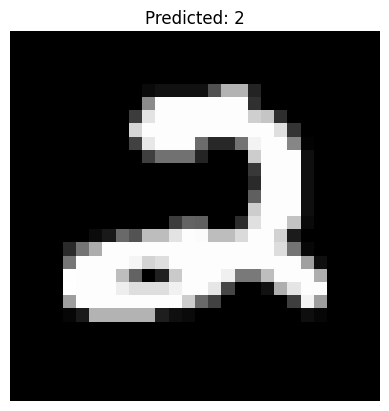

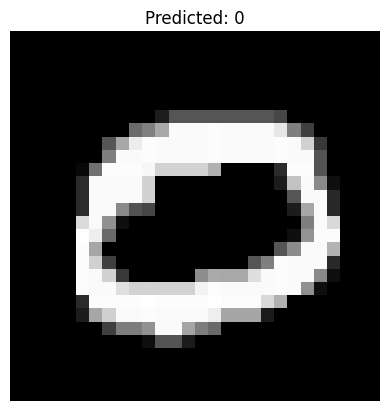

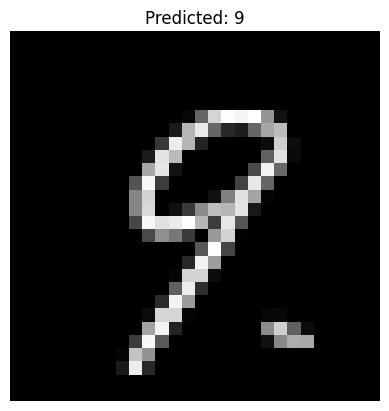

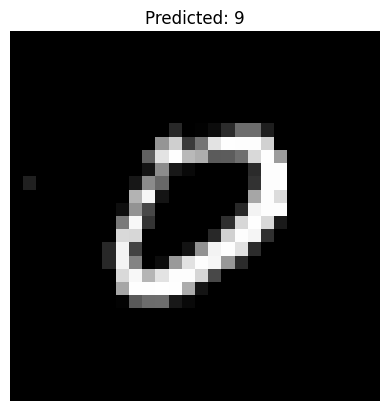

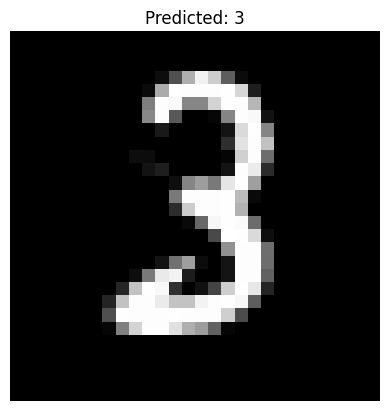

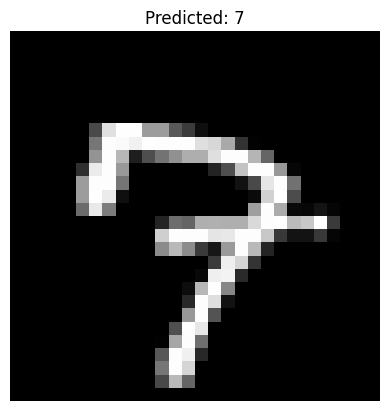

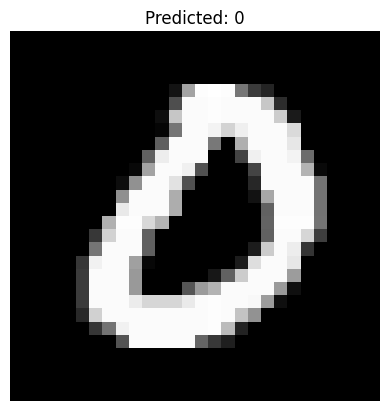

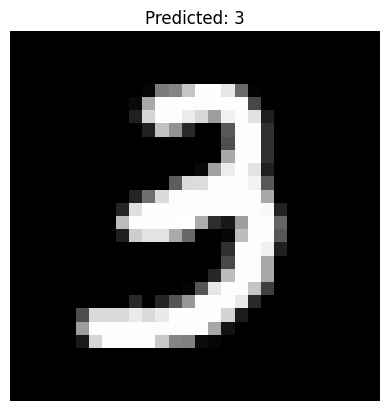

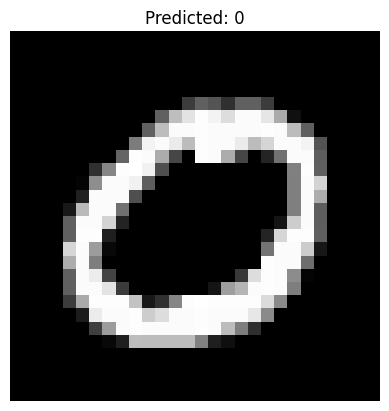

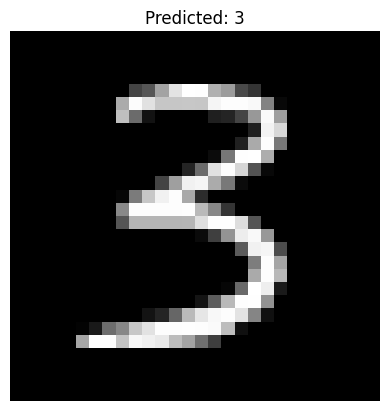

In [47]:
# Separate features (assuming test data has no labels)
X_test = test_df.values

# Normalize the pixel values
X_test = X_test / 255.0

# Reshape the data to fit the model (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Load the saved model
model_path = '../model'
model_name = 'digit_classifier.h5'
model_full_path = os.path.join(model_path, model_name)
model = load_model(model_full_path)

# Predict on the test data
predictions = model.predict(X_test)

# Display the first 10 predictions
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()